# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business. 


### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below.

Data Dictionary

order_id: Unique ID of the order

customer_id: ID of the customer who ordered the food

restaurant_name: Name of the restaurant

cuisine_type: Cuisine ordered by the customer

cost_of_the_order: Cost of the order

day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating: Rating given by the customer out of 5

food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Write your code here to read the data

df = pd.read_csv("foodhub_order.csv")

In [3]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Dataset has 1898 rows × 9 columns.
* No missing values across columns.
* Mix of numeric (int, float) and categorical (object) data types.
* 'rating' is of type object, which suggests ratings might be stored as strings (e.g., "Not given", "5", "4.5") instead of          numeric values — may need cleaning or type conversion.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

No missing values are present in any of the 9 columns - the dataset is complete.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

* Average **order cost ≈ 16.5** with a range from 4.47 to 35.41.
* **Food preparation time** averages \~27 mins (20–35 range).
* **Delivery time** averages \~24 mins (15–33 range).
* There is no huge difference between mean and median (50%) value of all three variable. 

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
Out of 1898 orders, 736 (≈39%) were not rated, while most rated orders received 5 stars (588), followed by 4 stars (386) and 3 stars (188).

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

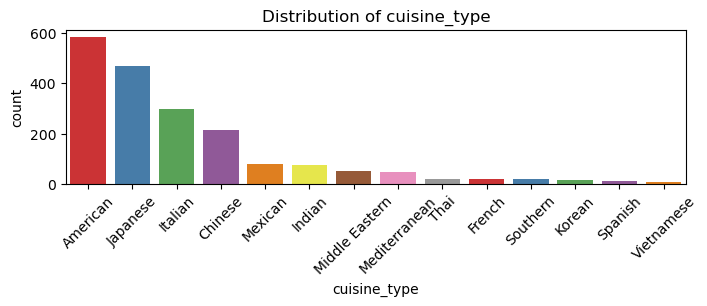

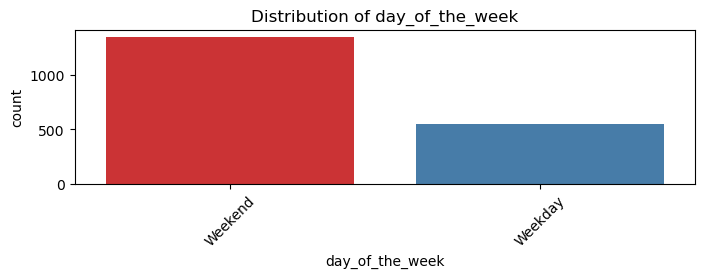

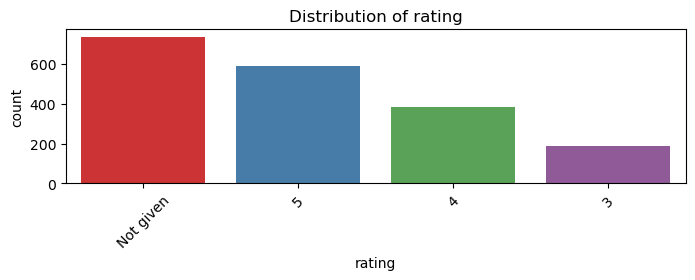

In [10]:
# Plotting all the categorical variables "cuisine_type", "day_of_the_week", and "rating"

categorical_cols = ["cuisine_type", "day_of_the_week", "rating"]

for col in categorical_cols:
    plt.figure(figsize=(8,2))
    sns.countplot(data = df, x = col, order=df[col].value_counts().index, palette="Set1")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

#### Observations:

1. Cuisine Type Distribution
* American cuisine is the most ordered, followed by Japanese and Italian.
* Other cuisines like Chinese and Mexican also have significant orders.
* Less popular cuisines include Korean, Spanish, Vietnamese, and others with very few orders.
* The distribution is highly skewed, dominated by a few cuisines.

2. Day of the Week Distribution
* Majority of orders are placed on Weekends (almost double compared to weekdays).
* Indicates higher food demand during weekends.

3. Rating Distribution
* A large number of orders are “Not given” (unrated).
* Among rated orders, 5-star ratings dominate, followed by 4-star and 3-star.
* Very few low ratings, suggesting mostly positive feedback when customers do rate.

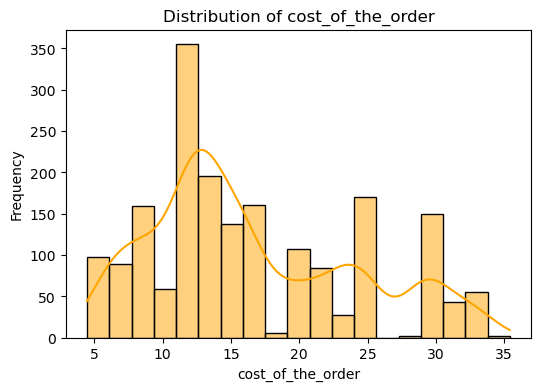

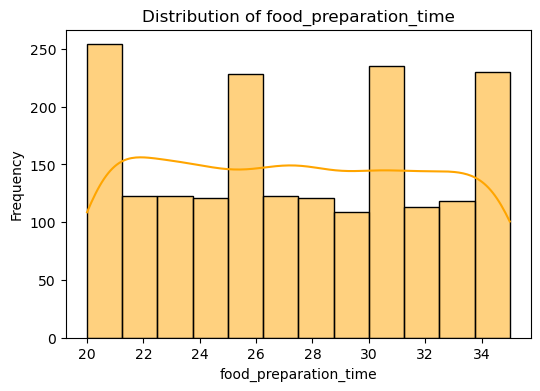

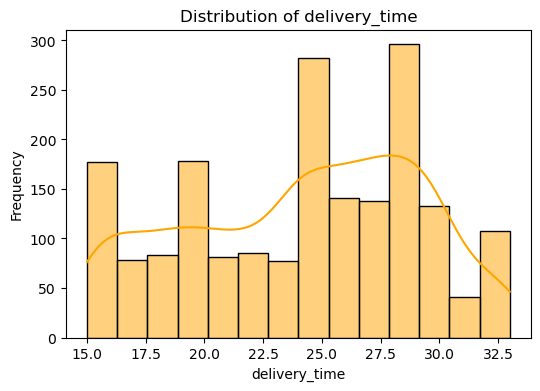

In [11]:
# Plotting all the numerical variables "cost_of_the_order", "food_preparation_time" and "delivery_time"

numeric_cols = ["cost_of_the_order", "food_preparation_time", "delivery_time"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True, color="orange")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### Observations:

1. Cost of the Order
* The majority of orders fall in the range of 10 to 20 units, peaking around 12–13 units.
* Fewer orders are observed at the extreme low around 5 and high around 35 cost values.
* The distribution is right-skewed, indicating that while most orders are moderately priced, a few high-cost orders push the tail to the right.

2. Food Preparation Time
* Preparation times are mostly between 20 and 35 minutes, with no extreme outliers.
* The distribution is fairly uniform, showing that restaurants prepare food in roughly consistent time slots.
* Common preparation times are at 20, 25, 30, and 35 minutes, possibly due to rounding or standard kitchen practices.

3. Delivery Time
* Delivery times range from 15 to 33 minutes.
* Most orders cluster around 25–30 minutes, with peaks at these intervals.
* Very few deliveries are faster than 18 minutes or longer than 32 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [12]:
# Write the code here
top5 = df["restaurant_name"].value_counts().head(5)
top5

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

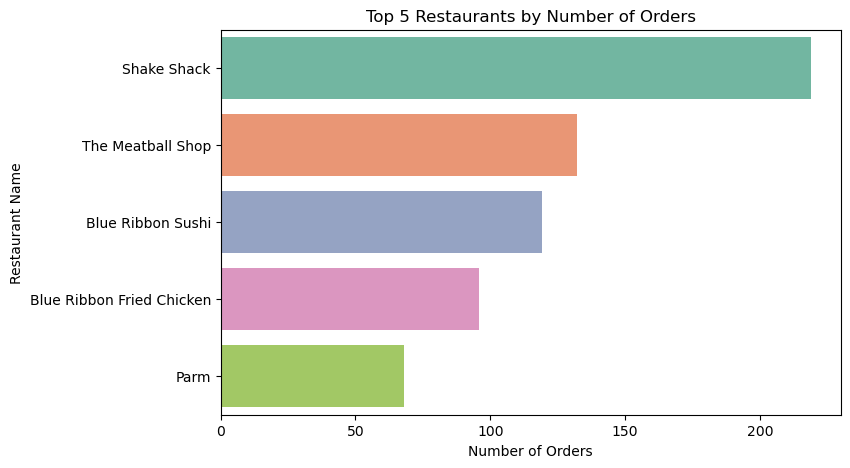

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=top5.values, y=top5.index, palette="Set2")
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()

#### Observations:

* The top file restaruants in terms of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.
* Shake Shack leads with over 220 orders, making it the most popular restaurant. The Meatball Shop and Blue Ribbon Sushi follow with around 130 and 115 orders. Blue Ribbon Fried Chicken and Parm have fewer orders, about 95 and 70 respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [14]:
# Write the code here
cuisine_weekend = df[df["day_of_the_week"] == "Weekend"]["cuisine_type"].value_counts().head(5)
cuisine_weekend 

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

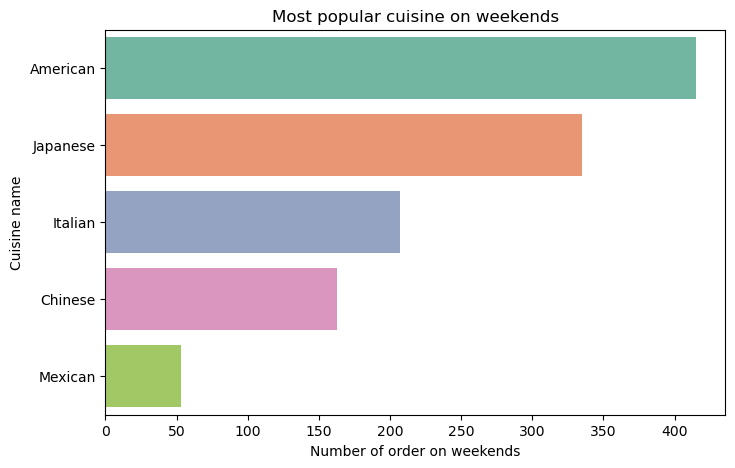

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_weekend.values, y=cuisine_weekend.index, palette="Set2")
plt.title("Most popular cuisine on weekends")
plt.xlabel("Number of order on weekends")
plt.ylabel("Cuisine name")
plt.show()

#### Observations:

American cuisine leads with over 410 weekend orders, making it the most popular. Japanese cuisine follows with about 340 orders, while Italian and Chinese have moderate demand. Mexican cuisine is the least preferred, with only around 55 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here

total_order = len(df)

order_above_20 = df[df["cost_of_the_order"] > 20].shape[0]

percentage_above_20 =(order_above_20 / total_order)*100

percentage_above_20

29.24130663856691

#### Observations:
Around 29.2% of the orders cost more than $20, indicating that most orders are moderately priced, while nearly one-third fall into the higher-cost range.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [33]:
# Write the code here

df["delivery_time"].mean()

24.161749209694417

#### Observations:

The average delivery time is about 24 minutes, suggesting that most orders are delivered within a reasonable timeframe of around 20–30 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [45]:
# Write the code here
top3customer = df["customer_id"].value_counts().head(3)
top3customer

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

The top 3 most frequent customers Id whoe placed the orders are 52832, 47440 and, 83287 and number of orders they placed were 13, 10, and 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


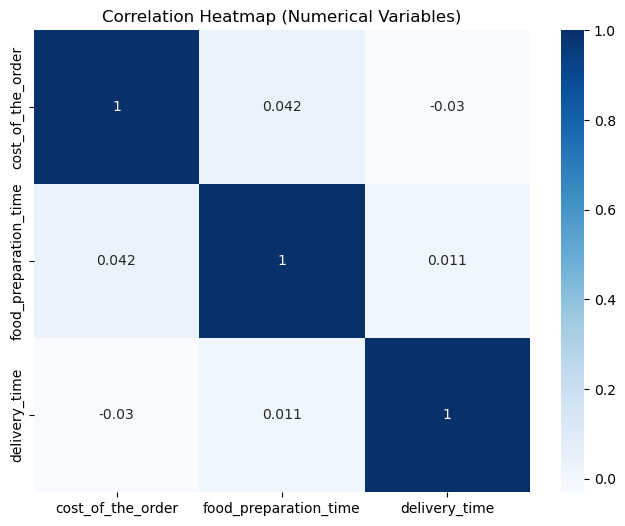

In [49]:
# Plotting correlation heatmap of all the numberical variables.

numerical_col =  ["cost_of_the_order", "food_preparation_time", "delivery_time"]

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap = "Blues")
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()


#### Observations:

* The correlations among the three numerical variables (cost_of_the_order, food_preparation_time, and delivery_time) are very weak (close to 0).

* Cost of the order has almost no relationship with food preparation time (0.042) or delivery time (-0.03).

* Food preparation time and delivery time also show negligible correlation (0.011).

* This suggests that higher order costs do not necessarily increase prep or delivery times, and prep time does not strongly influence delivery time.

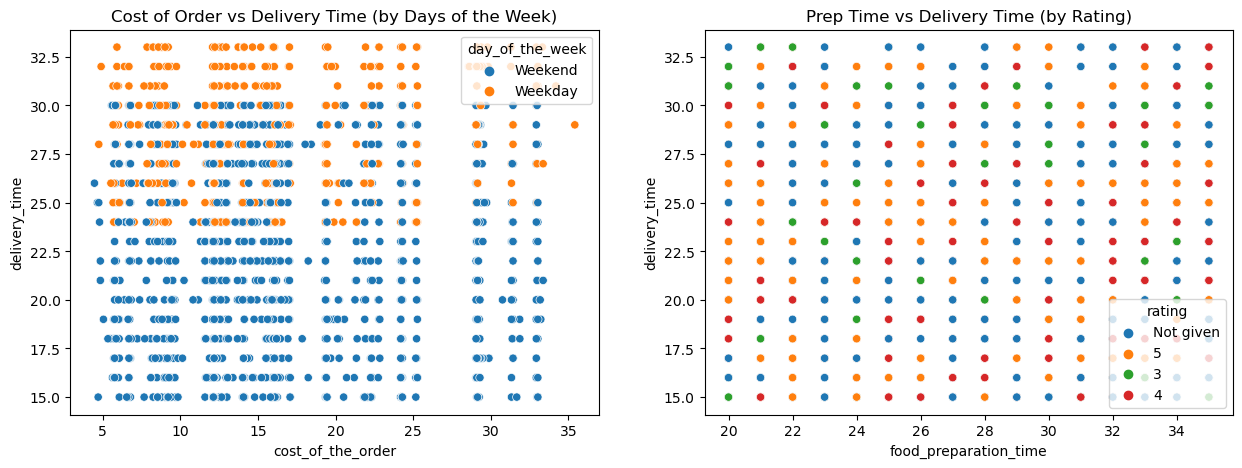

In [62]:
# plotting the scatter plot to check linear or non-linear relations

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = "cost_of_the_order", y = "delivery_time", hue = "day_of_the_week")
plt.title("Cost of Order vs Delivery Time (by Days of the Week)")


plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "food_preparation_time", y = "delivery_time", hue = "rating")
plt.title("Prep Time vs Delivery Time (by Rating)")
plt.show()

#### Observations:

**Cost of Order vs Delivery Time (by Day of the Week)**

* Delivery times appear fairly consistent across both weekdays and weekends, mostly clustering between 20–30 minutes.

* The cost of orders is spread across a wide range, but higher costs do not necessarily result in longer delivery times.

* Weekday and weekend patterns overlap, showing no significant difference in delivery efficiency.

**Food Preparation Time vs Delivery Time (by Rating)**

* Delivery times are again mostly concentrated between 20–30 minutes, regardless of preparation time.

* Ratings (3, 4, 5, and Not given) are distributed across the full range of delivery times, indicating that customer ratings are not strongly correlated with prep or delivery time.

* This suggests that factors other than prep and delivery time (such as food quality or taste) may influence ratings.


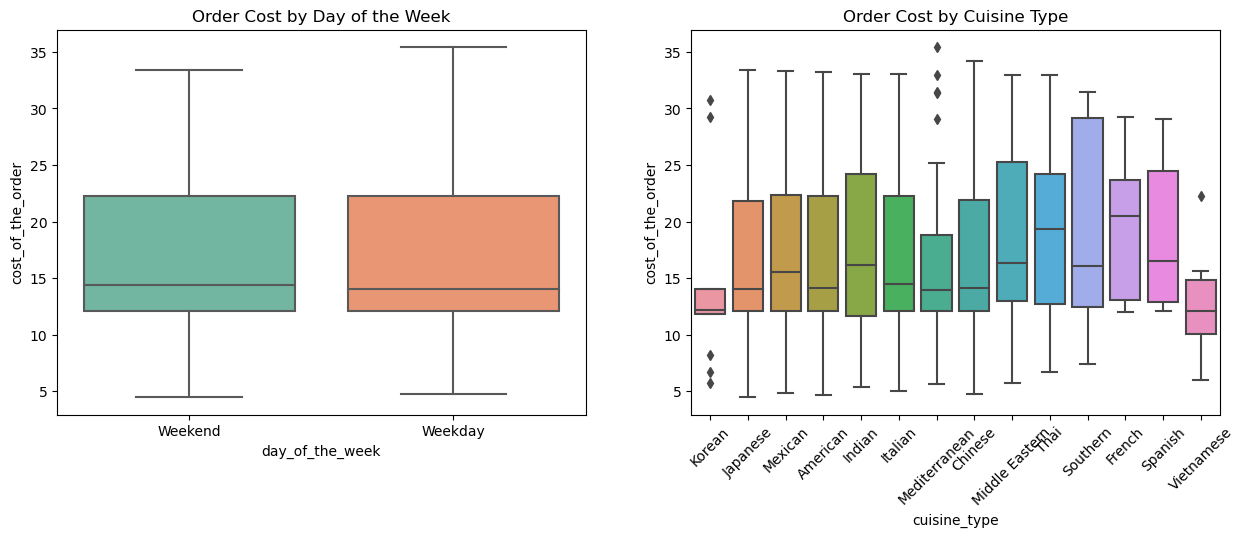

In [64]:
# Plotting Boxplots to helps compare distributions across categories. 

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = "day_of_the_week", y = "cost_of_the_order", palette= "Set2")
plt.title("Order Cost by Day of the Week")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = "cuisine_type", y ="cost_of_the_order")
plt.title("Order Cost by Cuisine Type")
plt.xticks(rotation=45)
plt.show()

#### Observations:

**Order Cost by Day of the Week (Left Plot):**

* The median order cost is almost the same for weekends and weekdays.

* The spread of order costs (IQR) is wider on weekends, indicating more variability in spending.

* Higher order cost outliers are present on weekdays, suggesting some very expensive orders.

**Order Cost by Cuisine Type (Right Plot):**

* There is significant variation in cost across cuisine types.

* Southern, Middle Eastern, and French cuisines show higher median and upper order costs.

* Korean and Vietnamese cuisines generally have lower order costs with smaller variation.

* Outliers exist in several cuisines (e.g., Italian, Chinese, Southern), representing high-value orders.

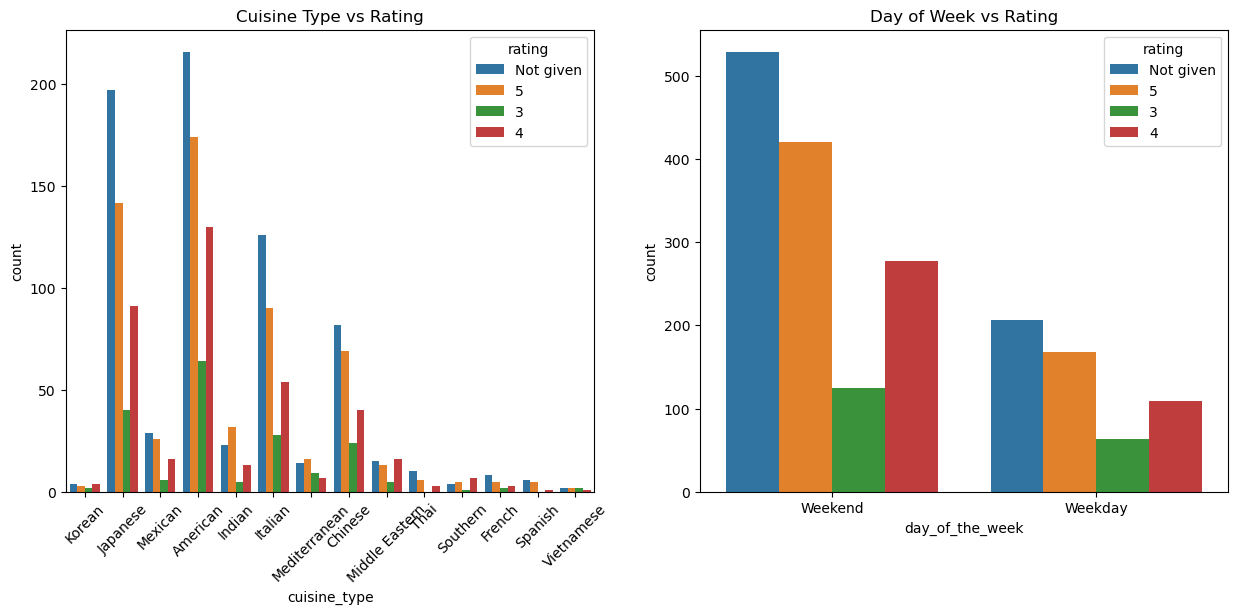

In [68]:
# plotting countplots with hue to see how raing differ across cuisine types or weekdays/weekends
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='cuisine_type', hue='rating')
plt.title("Cuisine Type vs Rating")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='day_of_the_week', hue='rating')
plt.title("Day of Week vs Rating")
plt.show()


#### Observations:

**Cuisine Type vs Rating (Left Plot):**

* Across all cuisines, a large portion of customers did not give a rating.

* Japanese and American cuisines have the highest number of orders and ratings compared to other cuisines.

* For most cuisine types, rating 5 dominates among the given ratings, indicating overall positive customer experiences.

* Indian, Italian, and Middle Eastern cuisines also received a fair number of 4-star and 5-star ratings.

* Niche cuisines like French, Southern, Spanish, and Vietnamese have very few orders and ratings.

**Day of the Week vs Rating (Right Plot):**

* A significant number of customers did not provide ratings on both weekends and weekdays, but it is much higher during weekends.

* 5-star ratings are the most common among provided ratings, especially on weekends.

* Weekends see a much higher order volume and more ratings (both positive and neutral) compared to weekdays.

* 3-star and 4-star ratings are comparatively fewer but still more frequent on weekends than weekdays.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [80]:
#Write the code

df_valid_ratings = df[df['rating'] != 'Not given'].copy()
df_valid_ratings['rating'] = df_valid_ratings['rating'].astype(int)


restaurant_ratings = df_valid_ratings.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()


eligible_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) & 
    (restaurant_ratings['avg_rating'] > 4)
]

eligible_restaurants

,restaurant_name,rating_count,avg_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:

* Four restaurants qualify for the promotional offer as they have more than 50 ratings and an average rating above 4.

* Among them, The Meatball Shop stands out with the highest average rating (4.51), indicating strong customer satisfaction.

* Shake Shack has the largest rating count (133), reflecting high customer engagement along with a good average rating (4.28).

* Blue Ribbon Fried Chicken (64 ratings, avg. 4.33) and Blue Ribbon Sushi (73 ratings, avg. 4.22) also meet the criteria, showing consistent positive feedback.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [81]:
# Write the code here

def commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
    
df["revenue"] = df["cost_of_the_order"].apply(commission)

net_revenue = df["revenue"].sum()
net_revenue

6166.303

#### Observations:

The net revenue generated by the company across all orders is $6166.303.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [82]:
# Write the code here
df["total_time"] = df["food_preparation_time"] + df ["delivery_time"]

above_60 = (df["total_time"] > 60).sum()

percentage = (above_60/len(df))*100

percentage

10.537407797681771

#### Observations:

10.53% of orders has taken more than 60 minutes to get delivered from the time the order is placed. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [84]:
# Write the code here

mean_delivery = df.groupby("day_of_the_week")["delivery_time"].mean()
mean_delivery

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

The mean delivery time on weekdays is about 28.3 minutes, while on weekends it reduces to around 22.5 minutes. This indicates that orders are delivered significantly faster on weekends compared to weekdays, possibly due to lighter traffic or more efficient resource allocation.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Customer Ratings**
* A large number of customers did not provide ratings, but those who did mostly gave 5 stars, showing generally positive experiences.

* Certain restaurants like The Meatball Shop, Shake Shack, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi consistently received high ratings and large rating counts.

**Cuisine Trends**

* American and Mexican cuisines are the most frequently ordered, showing high popularity.

* Premium cuisines like French, Middle Eastern, and Southern have higher order costs, but fewer orders, suggesting they cater to a niche customer base.

**Delivery Insights**

* Mean delivery time is faster on weekends (22.5 mins) compared to weekdays (28.3 mins).

* Most deliveries are completed within 60 minutes, but delays occur when both preparation and delivery times are high.

**Revenue Contribution**

* Around 29% of orders cost more than $20, contributing heavily to company revenue due to the higher 25% commission rate.

* Mid-range orders ($5–$20) form the majority and are also a stable revenue stream.

### Recommendations:

**Boost Customer Feedback**

* Encourage customers to leave ratings by offering loyalty points or small discounts. More ratings will help identify weak spots in service.

**Promote High-Rated Restaurants**

* Partner with restaurants like The Meatball Shop, Shake Shack, and Blue Ribbon outlets in advertisements since they already have high ratings and customer trust.

**Cuisine-Specific Promotions**

* Run weekend offers on American and Mexican cuisines, as they are already popular and can drive more orders.

* Highlight premium cuisines (French, Middle Eastern, Southern) with targeted ads to attract high-value customers.

**Operational Improvements**

* Since delivery is slower on weekdays, consider increasing delivery staff or optimizing routes during peak weekday hours.

* Provide real-time order tracking to improve customer satisfaction, especially when total time exceeds 60 minutes.

**Revenue Optimization**

* Focus marketing efforts on promoting orders above $20, as they bring higher commissions.

* Introduce bundle offers or upselling strategies (e.g., add-ons, desserts, drinks) to push more orders into the >$20 category.